## Nuage de points wordcloud

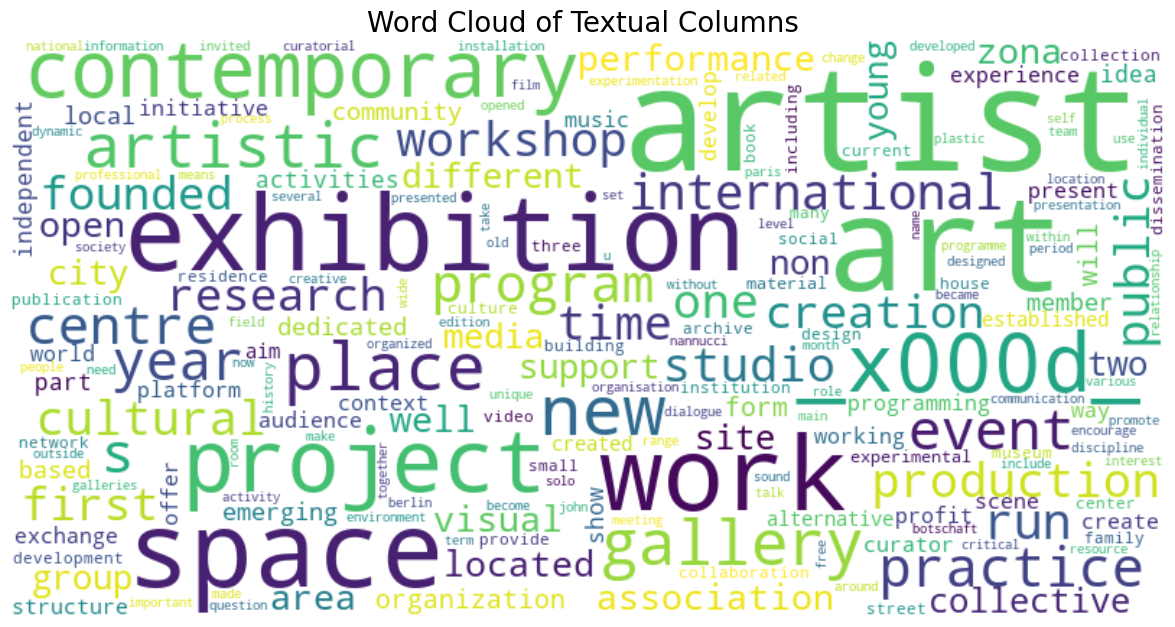

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Lire le fichier Excel
try:
    df = pd.read_excel('fichier_traduit.xlsx')
except FileNotFoundError:
    print("Le fichier 'fichier_traduit.xlsx' n'a pas été trouvé.")
    exit()

# Spécifier les colonnes textuelles
colonnes_textuelles = ['presentation', 'historique', 'activites', 'réponse1', 'réponse2']

# Vérifier l'existence des colonnes et gérer les NaN
for colonne in colonnes_textuelles:
    if colonne not in df.columns:
        print(f"Attention : La colonne '{colonne}' n'existe pas dans le fichier Excel.")

# Combiner tout le texte des colonnes existantes en une seule colonne
# Remplacer les NaN par des chaînes vides et convertir en minuscules
df['texte_combine'] = df[colonnes_textuelles].fillna('').astype(str).agg(' '.join, axis=1).str.lower()

# Joindre toutes les chaînes de la colonne combinée en une seule grande chaîne
texte_combine = ' '.join(df['texte_combine'].tolist()).replace('\n', ' ').replace('\r', ' ')

# Définir les mots à exclure (stopwords) en français
stopwords = set(STOPWORDS)
stopwords.update([
    'un', 'une', 'le', 'la', 'les', 'et', 'de', 'à', 'en', 'du', 'des',
    'pour', 'dans', 'que', 'qui', 'avec', 'il', 'elle', 'ils', 'elles',
    'ce', 'cette', 'cela', 'ces', 'son', 'sa', 'ses', 'notre', 'votre',
    'leurs', 'mais', 'ou', 'donc', 'or', 'ni', 'car'
])

# Créer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    collocations=False,  # Pour éviter les doublons de mots
    max_words=200,
    max_font_size=100,
    random_state=42
).generate(texte_combine)

# Afficher le nuage de mots
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Textual Columns ', fontsize=20)
plt.show()


## L'utilisation de nltk

### Lecture des données et gerer les valeurs Nan

In [3]:
import pandas as pd

# Lire le fichier Excel
try:
    df = pd.read_excel('fichier_traduit.xlsx')
except FileNotFoundError:
    print("Le fichier 'fichier_traduit.xlsx' n'a pas été trouvé.")
    exit()


# Spécifier les colonnes textuelles
colonnes_textuelles = ['presentation', 'historique', 'activites', 'réponse1', 'réponse2']

# Vérifier l'existence des colonnes et gérer les NaN
colonnes_existantes = [col for col in colonnes_textuelles if col in df.columns]
colonnes_manquantes = set(colonnes_textuelles) - set(colonnes_existantes)

for colonne in colonnes_manquantes:
    print(f"Attention : La colonne '{colonne}' n'existe pas dans le fichier Excel.")

# Combiner tout le texte des colonnes existantes en une seule colonne
df['texte_combine'] = df[colonnes_existantes].fillna('').astype(str).agg(' '.join, axis=1).str.lower()

# Joindre toutes les chaînes de la colonne combinée en une seule grande chaîne
texte_combine = ' '.join(df['texte_combine'].tolist()).replace('\n', ' ').replace('\r', ' ')


### Prétraitement des textes avec NLTK

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

 
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Définir les stopwords en anglais
stop_words = set(stopwords.words('english'))
# Ajouter des ponctuations aux stopwords
stop_words.update(string.punctuation)

# Tokenisation
tokens = word_tokenize(texte_combine)

# Suppression des stopwords et des tokens non alphabétiques
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Lemmatisation
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]


In [7]:
import nltk
import os

# Définir un répertoire de téléchargement spécifique
nltk.download('punkt', download_dir='~/nltk_data')
nltk.download('stopwords', download_dir='~/nltk_data')
nltk.download('wordnet', download_dir='~/nltk_data')

# Ajouter le chemin vers nltk_data
nltk.data.path.append(os.path.expanduser('~/nltk_data'))


[nltk_data] Downloading package punkt to ~/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ~/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to ~/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import nltk
import os

# Ajouter le chemin vers nltk_data
nltk.data.path.append(os.path.expanduser('~/nltk_data'))

# Vérifier les ressources
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
    print("Toutes les ressources NLTK sont disponibles.")
except LookupError as e:
    print(f"Erreur : {e}")


Toutes les ressources NLTK sont disponibles.


### Analyse des frequences des mots 

In [5]:
from collections import Counter

# Calculer la fréquence des mots
word_freq = Counter(lemmatized_tokens)

# Afficher les 20 mots les plus fréquents
print("20 mots les plus fréquents :")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")


NameError: name 'lemmatized_tokens' is not defined

### Generation des nuages de points 

- 

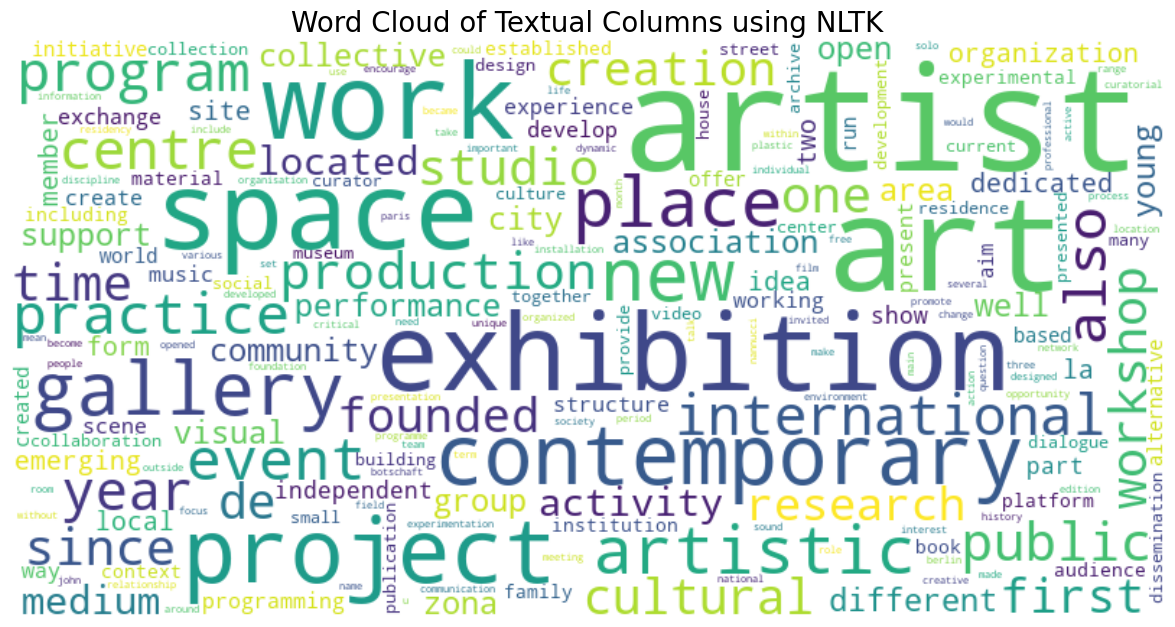

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Créer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    collocations=False,  # Pour éviter les doublons de mots
    max_words=200,
    max_font_size=100,
    random_state=42
).generate(' '.join(lemmatized_tokens))

# Afficher le nuage de mots
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Textual Columns using NLTK', fontsize=20)
plt.show()


### Analyse des bigrammes

In [18]:
from nltk.util import ngrams

# Générer des bigrammes
bigram = ngrams(lemmatized_tokens, 2)
bigram_freq = Counter(bigram)

# Afficher les 20 bigrammes les plus fréquents
print("\n20 bigrammes les plus fréquents :")
for bg, freq in bigram_freq.most_common(20):
    print(f"{' '.join(bg)}: {freq}")



20 bigrammes les plus fréquents :
contemporary art: 146
work work: 140
exhibition space: 39
visual art: 39
family family: 37
young artist: 32
artistic practice: 31
art space: 29
work artist: 29
project space: 27
international artist: 26
new medium: 24
artist run: 24
de la: 23
artist curator: 22
emerging artist: 22
la de: 21
maurizio nannucci: 20
art scene: 19
franklin furnace: 19


***Lextraction des topics***

In [11]:
from collections import Counter

# Compter la fréquence des mots
word_freq = Counter(lemmatized_tokens)

# Afficher les 20 mots les plus fréquents
print("\n50 mots les plus fréquents :")
for word, freq in word_freq.most_common(50):
    print(f"{word}: {freq}")



50 mots les plus fréquents :
artist: 898
art: 758
space: 473
exhibition: 460
work: 450
project: 310
contemporary: 255
gallery: 199
new: 197
place: 185
artistic: 165
event: 131
also: 124
practice: 123
program: 119
centre: 119
international: 117
year: 110
public: 105
production: 102
time: 98
workshop: 98
studio: 98
one: 96
since: 96
cultural: 93
de: 91
founded: 89
first: 89
creation: 89
research: 88
activity: 88
located: 88
medium: 85
performance: 85
area: 83
open: 82
well: 81
association: 80
zona: 80
visual: 78
collective: 77
different: 77
support: 76
group: 73
young: 72
city: 72
community: 70
organization: 68
form: 68


### Visualisation avec matplotlib

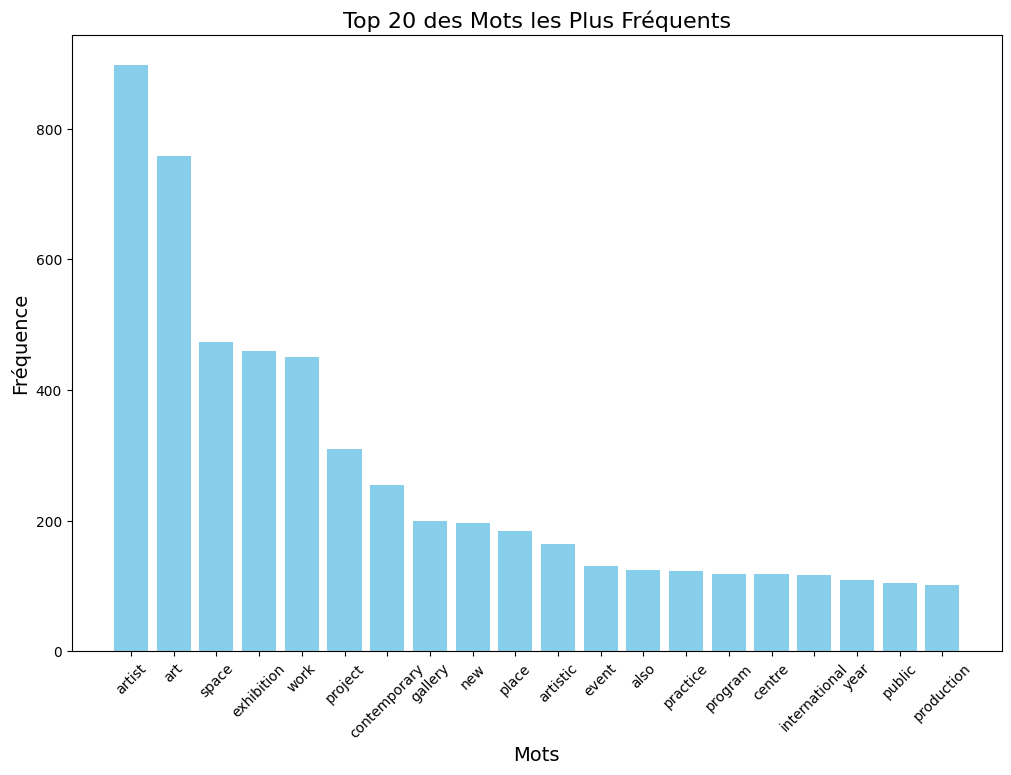

In [19]:
# Sélectionner les 20 mots les plus fréquents
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

# Créer un graphique à barres
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Mots', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.title('Top 20 des Mots les Plus Fréquents', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [20]:
# Exemple de lemmatisation
print("\nExemples de lemmatisation :")
example_words = ['running', 'better', 'children', 'cars']
lemmatized_example = [lemmatizer.lemmatize(word) for word in example_words]
print(lemmatized_example)



Exemples de lemmatisation :
['running', 'better', 'child', 'car']
